In [1]:
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [5]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [7]:
duplicate_rows = tips[tips.duplicated()]

In [8]:
duplicate_rows

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [9]:
tips.drop_duplicates(inplace = True)

In [10]:
duplicate_rows = tips[tips.duplicated()]
duplicate_rows

,total_bill,tip,sex,smoker,day,time,size


In [11]:
tips['time'].nunique()

2

In [12]:
tips['size'].nunique()

6

In [13]:
tips['day'].nunique()

4

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_26776\1836578920.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tips.corr(), annot = True)


<Axes: >

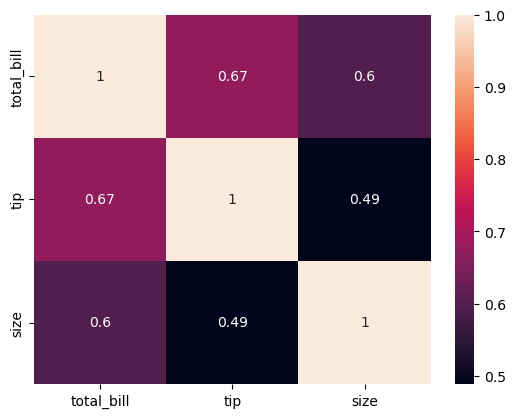

In [14]:
sns.heatmap(tips.corr(), annot = True)

<Axes: xlabel='total_bill', ylabel='tip'>

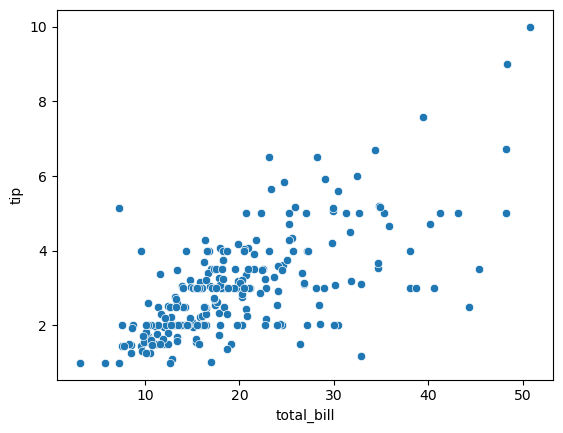

In [15]:
x = tips['total_bill']
y = tips['tip']
sns.scatterplot(x=x,y=y,data = tips)

<Axes: xlabel='total_bill', ylabel='tip'>

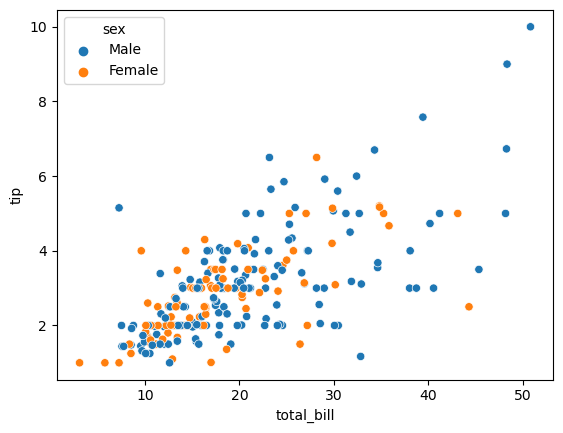

In [16]:
x = tips['total_bill']
y = tips['tip']
sns.scatterplot(x=x,y=y,data = tips, hue = 'sex')

<Axes: xlabel='total_bill', ylabel='tip'>

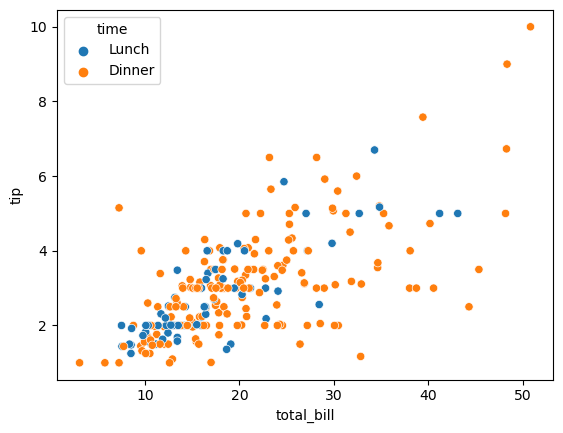

In [17]:
x = tips['total_bill']
y = tips['tip']
sns.scatterplot(x=x,y=y,data = tips, hue = 'time')

In [18]:
data = list(zip(x, y))

In [19]:
data[0]

(16.99, 1.01)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [21]:
label_encoder = LabelEncoder()
numerical_data = label_encoder.fit_transform(tips['sex']) #Converting the categorical data to numeric data

In [22]:
import numpy as np
num_unique_elements = len(np.unique(numerical_data))

In [23]:
num_unique_elements

2

In [24]:
[numerical_data[i] for i in range(0,5)]

[0, 1, 1, 1, 0]

In [25]:
[numerical_data[i] for i in range(0,10) if numerical_data[i] == 1]

[1, 1, 1, 1, 1, 1, 1, 1]

In [26]:
[numerical_data[i] for i in range(0,10) if numerical_data[i] == 0]

[0, 0]

In [27]:
#dinner is marked as 0 and Lunch is marked as 1

In [28]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data, numerical_data)

KNeighborsClassifier(n_neighbors=3)

In [29]:
new_bill = 30
new_tip = 4.7
new_data = [(new_bill,new_tip)]
prediction = knn.predict(new_data)

In [30]:
prediction[0]

0

In [31]:
import matplotlib.pyplot as plt

<Axes: xlabel='total_bill', ylabel='tip'>

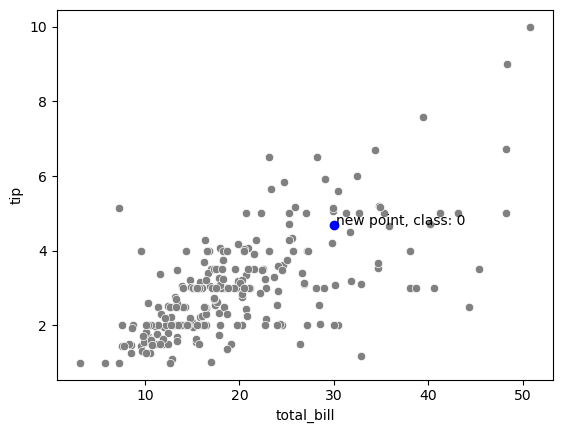

In [32]:
plt.scatter(x =new_bill, y =new_tip, c='pink' if prediction[0]==1 else 'blue')
plt.text(x=new_bill+0.2, y=new_tip, s=f"new point, class: {prediction[0]}")
x = tips['total_bill']
y = tips['tip']
sns.scatterplot(x=x,y=y,data = tips, c = 'grey')

In [33]:
new_bill = 15
new_tip = 1
new_data = [(new_bill,new_tip)]
prediction = knn.predict(new_data)
prediction[0]

1

<Axes: xlabel='total_bill', ylabel='tip'>

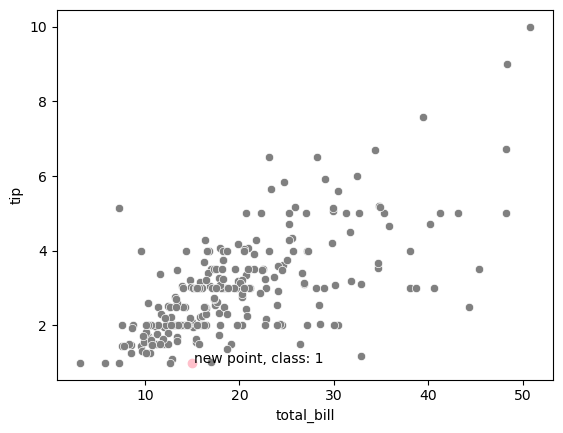

In [34]:
plt.scatter(x =new_bill, y =new_tip, c='pink' if prediction[0]==1 else 'blue')
plt.text(x=new_bill+0.2, y=new_tip, s=f"new point, class: {prediction[0]}")
x = tips['total_bill']
y = tips['tip']
sns.scatterplot(x=x,y=y,data = tips, c = 'grey')